# Improving the H$_2^+$ Variational Approximation

## Motivation:

The linear combination of atomic orbital (LCAO) description of the H$_2^+$ molecule that we saw in [previous notes](Single_Electron_Molecule_Variational_Approach.ipynb) gives a qualitatively correct but quantitatively inaccurate picture of bond formation.  In these notes, we will discuss ways of improving the basis functions to yield more quantitively correct results. 

## Learning Goals:

After working through these notes, you will be able to:

1. Define the difference between a Hydrogen-atom orbital and a Slater orbital
2. Describe how using Slater 1s orbitals allows us to get an improved variational result for the H$_2^+$ molecule as compared to hydrogen-atom 1s orbitals
3. Describe what it means to include polarization functions in atomic orbitals.

## Coding Concepts: 

The following coding concepts are used in this notebook:

1. [Variables](../../coding_concepts/variables.ipynb)
2. [Functions](../../coding_concepts/functions.ipynb)
3. [Plotting with matplotlib](../../coding_concetps/plotting_with_matplotlib.ipynb)

## Background

We saw in the [previous notes](Single_Electron_Molecule_Variational_Approach.ipynb) that the variational solution to H$_2^+$ in a minimal basis (hydrogen atom 1s basis functions on each nucleus) yields a qualitatively correct picture of covalent bond formation but is not a good quantitative match with the excact solution.  Specifically, the predicted bond length is 2.5 Bohr in the minimal basis approximation but is 2.0 in the exact solution.  Additionally, the bond energy is -0.064 Hartree in the minimal basis and just over -0.1 Hartree in the exact solution.  

There are two obvious ways to improve the variational solution:

1. Increase the basis set size
2. Improve the basis functions

In these notes we will address option two.  We will do so in two ways: first by adding a variational parameter to the basis functions themselves and second by including polarization functions.

## Including Variational Parameters in the Basis Functions

In the previous notes we used a trial wave function of
\begin{align}
\phi(r_A,r_B;R) = c_11s_A(r_A) + c_21s_B(r_B)
\end{align}
where $1s_A$ denotes a hydrogen atom 1s wave function centered on nucleus $A$ and is given by the function
\begin{equation}
1s(r) = \sqrt{\frac{1}{\pi}} e^{-r}
\end{equation}

In our variational example of the helium atom we introduced the idea of using the effective nuclear charge as a variational parameter.  We will do so again here.  This is a fairly general procedure and the hydrogen atom functions with nuclear charge as a variable (e.g. as $Z$ or $\zeta$) are called Slater orbitals.  The Slater 1s orbital is
\begin{equation}
\phi_{1s}(Z,r) = \sqrt{\frac{Z^3}{\pi}} e^{-Zr}
\end{equation}

We will thus propose the following wave function
\begin{equation}
\psi(Z,r_A,r_B;R) = c_1\phi_{1s}(Z,r_A) + c_2\phi_{1s}(Z,r_B)
\end{equation}

If you recall from our discussion of the variational solution in the minimal basis, there was no need to determine $c_1$ and $c_2$ using the variational approach since it can be argued that their magnitudes should be the same and these magnitudes can be determined by normalization.   These same arguments hold here (despite introducing the $Z$ variable).  Thus, the normalized trial wave function is
\begin{equation}
\psi(Z,r_A,r_B;R) = \frac{\phi_{1s}(Z,r_A) + \phi_{1s}(Z,r_B)}{\sqrt{2(1+S(Z,R))}}
\end{equation}
where $S(Z,R)$ is the overlap integral between the two basis functions.  That is
\begin{equation}
S(Z,R) = \left\langle \phi_{1s}(Z,r_A) | \phi_{1s}(Z,r_B) \right\rangle
\end{equation}
You will show for homework that this integral is
\begin{equation}
S(Z,R) = e^{-ZR}\left(1+ZR+\frac{1}{3}Z^2R^2\right)
\end{equation}

Using this trial wave function it can be shown that
\begin{align}
E_\psi &= \left\langle \psi(Z,r_A,r_B;R) | \hat{H} | \psi(Z,r_A,r_B;R) \right\rangle \\
&= \frac{ \frac{Z^2}{2} - Z^2\left[\frac{S(Z,R)}{2} + K(Z,R)\right]}{1+S(Z,R)} + \frac{-Z + ZJ(Z,R) + 2ZK(ZR)}{1+S(Z,R)} + \frac{Z}{KR}
\end{align}

Differentiating $E_\psi$ w.r.t $Z$, setting to zero, and solving for $Z_{min}$ yields
\begin{align}
Z_{min} &= 1.238 \\
E_{min} &= -0.58651 \text{ Hartree}
\end{align}
Note that this is only strictly true at the value for $R$ for which this is determined ($R=2.0$ Bohr).  Technically $E_{min}$ should be minimized w.r.t. $Z$ at every value of $R$.  

Below I plot $E$ as a function of $R$ and determine the minimum $Z$ at each $R$ value using a numeric minimzation routine.  I also plot the minimal basis result.

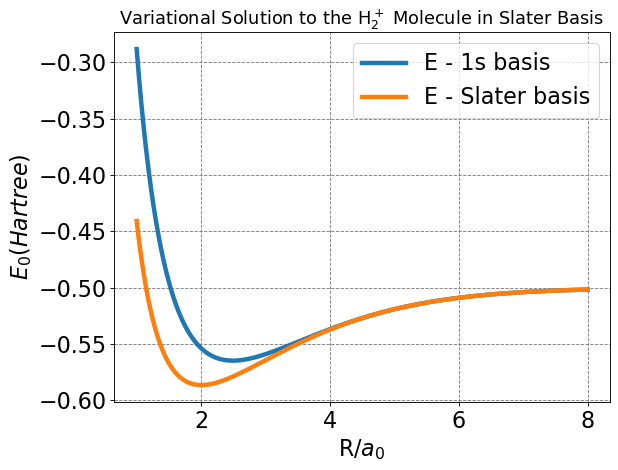

In [23]:
from scipy.optimize import minimize
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

def J(R):
    return np.exp(-2*R)*(1+1/R) - 1/R
def K(R):
    return -np.exp(-R)*(1+R)
def S(R):
    return np.exp(-R)*(1+ R + R*R/3)
def E(Z,R):
    T = Z**2/2-Z**2*(S(Z*R)/2 + K(Z*R))
    T /= (1+S(Z*R))
    V = -Z + Z*J(Z*R) + 2*Z*K(Z*R)
    V /= (1+S(Z*R))
    V += 1.0/R
    return T + V

R = np.arange(1,8,0.001)
plt.figure(figsize=(8,6),dpi= 80, facecolor='w', edgecolor='k')
plt.tick_params(axis='both',labelsize=20)
plt.grid( which='major', axis='both', color='#808080', linestyle='--')
E_1s_basis = np.empty(R.size)
E_slater_basis = np.empty(R.size)
Z_min = np.empty(R.size)
for i, r in enumerate(R):
    E_1s_basis[i] = E(1,r)
    Z_min[i] = minimize(E,1.0,args=(r)).x[0]
    E_slater_basis[i] = E(Z_min[i],r)
plt.plot(R,E_1s_basis,lw=4, label=r'E - 1s basis')
plt.plot(R,E_slater_basis,lw=4, label=r'E - Slater basis')
plt.xlabel(r'R/$a_0$',fontsize=20)
plt.ylabel(r'$E_0 (Hartree)$',fontsize=20)
#plt.ylim(-0.6,-0.2)
plt.legend(fontsize=20)
plt.title(r'Variational Solution to the H$_2^+$ Molecule in Slater Basis',fontsize=16);

We see that allowing the function to be modified at each value of $R$ to take on a specific effective nuclear charge allows the variational solution to lower and to become much closer to the exact value.  The value of the bond distance, in particular, is dramatically improved over the 1s minimal basis solution.

### Including Polarization Functions

In the previous example we modified the effective nuclear charge for a 1s-like orbital and saw significant improvement in doing so.  The spherical symmetry of the 1s orbital is still maintained in this process.  If we think about what our intuition tells us that a $\sigma$ bonding orbital will look like in this case, we would not consider it having spherical symmetry about each nucleus.  We might anticapte a large lobe between the two nuclei and small lobes on the opposing side.  This intuition is likely built on my own experiences reading chemistry text books etc but perhaps some of it is more general?

Regardless, it is likely the spherically symmetric behavior of a 1s orbital is not ideal to create a molecular covalent bond.  Thus, it is natural to hypothesize that basis functions that allow the breaking of the spherical symmetry and the creation of a lobe of density between the two nuclei to yield better results for the H$_2^+$ variational solution.

We must remember, however, that the 1s orbital is the correct solution at infinte separation.  Thus, a good basis will still allow for this behavior while becoming non-spherically symmetric as the two nuclei become close together.  We will achieve this behavior by adding a $p_z$ oribtal to the 1s orbital and allow for the amount of $p_z$ character to be determined at every $R$ value.  

Our trial wave function will thus look like
\begin{equation}
\psi(Z,r_A,r_B;R) = c_1(\phi_{1s}(Z_1,r_A) +a\phi_{2p_z}(Z_2,r_A,\theta_A))  + c_2(\phi_{1s}(Z_1,r_A) +a\phi_{2p_z}(Z_2,r_A,\theta_A))
\end{equation}
where 
\begin{align}
\phi_{1s}(Z,r) &= \sqrt{\frac{Z^3}{\pi}} e^{-Zr} \\
\phi_{2p_z}(Z,r,\theta) &= \sqrt{\frac{Z^5}{\pi}} r\cos\theta e^{-Zr} 
\end{align}
Notice that we can treat the effective nuclear charge for the 1s and 2p$_z$ parts as separate variational parameters.  Additionally, we will treat $a$, the amount of $p_z$ character in the polarized orbital, to be a variational parameter as well.  Below I plot the following polarized orbital for various values of $a$:
\begin{equation}
\phi = \phi_{1s}(Z_1,r_A) +a\phi_{2p_z}(Z_2,r_A,\theta_A)
\end{equation}

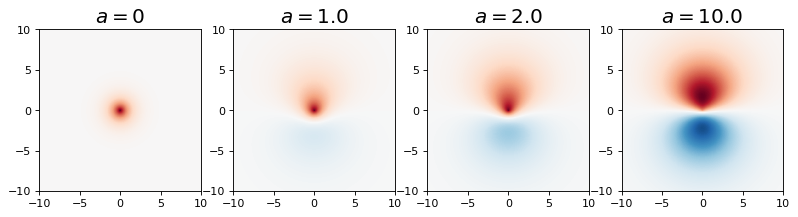

In [31]:
# make two plots of the same spherical harmonic
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm, colors
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import sph_harm
from scipy.special import eval_genlaguerre
from scipy.special import lpmv
from scipy.special import factorial
%matplotlib inline
from scipy.optimize import root
a0 = 1.0 # radial unit of Bohr!    
def hydrogen_atom_wf(r,theta,phi,n,l,m):
    Y_norm = np.sqrt((2*l+1)*factorial(l-np.abs(m))/(4*np.pi*factorial(l+np.abs(m))))
    R_prefactor = -np.sqrt(factorial(n-l-1)/(2*n*factorial(n+l)))*(2.0/(n*a0))**(l+1.5)*np.power(r,l)*np.exp(-r/(n*a0))
    R = R_prefactor*eval_genlaguerre(n-l-1,2*l+1,2*r/(n*a0))
    return Y_norm*sph_harm(m, l, phi, theta).real*R
    
def plot_polarize_hydrogen_atom_wf_xz_projection(n1,l1,m1,n2,l2,m2,a,ax_obj):
    x = np.linspace(-10,10,1000)
    z = np.linspace(-10,10,1000)
    X, Z= np.meshgrid(x, z)
    Y = np.zeros(X.shape)
    R = np.sqrt(X*X + Y*Y + Z*Z).flatten()
    THETA = np.arccos(Z.flatten()/R)
    PHI = np.arctan2(Y,X).flatten()
    wf = np.zeros(R.shape)
    wf = hydrogen_atom_wf(R,THETA,PHI,n1,l1,m1)
    wf += a*hydrogen_atom_wf(R,THETA,PHI,n2,l2,m2)
    wf = wf.reshape(X.shape)
    vmax = max(np.abs(np.amin(wf)),np.abs(np.amax(wf)))
    vmin = -vmax
    # plot
    ax_obj.set_title(rf'$a={a}$', fontsize=18)
    c = ax_obj.pcolormesh(X, Z, wf, cmap='RdBu', vmin=vmin, vmax=vmax)
    # set the limits of the plot to the limits of the data
    ax_obj.axis([-10, 10, -10, 10])
    ax_obj.set_aspect('equal')
    #ax_obj.set_axis_off()
    return c

fig, ax = plt.subplots(1,4,figsize=(12,4),dpi= 80, facecolor='w', edgecolor='k') 
A = [0,1.0, 2.0, 10.0]
for i, a in enumerate(A):
    plot_polarize_hydrogen_atom_wf_xz_projection(1,0,0,2,1,0,a, ax[i])

I will not solve this all the way out but it is doable.  The integrals get even messier etc but are still all solvable.  Instead I will just provide you with the results for the minimum energy and $R$ value:
\begin{align}
E_{min} &= -0.59907 \text{ Hartree} \\
R_{min} &= 2.00 \text{ Bohr}
\end{align}
This value for the energy and bond distance are very close to the exact solution.  The inclusion of the polarization dramatically improved the energy (though didn't have such a dramatic impact on the bond distance) as compared to just varationally optimizing the 1s-like orbitals.    